In [22]:
import matplotlib.pyplot as plt
from __future__ import division
import os, sys, random
import numpy as np

N = 5

<img src='./sutton_barto_maze.png' width=400 align='left'/>

In [23]:
def is_valid_state(curr_state):
    # check the validity of the current state
    if((curr_state[0] >= 0 and curr_state[0] < N) and
       (curr_state[1] >= 0 and curr_state[1] < N)):
        return True
    else:
        return False
        

In [41]:
def get_valid_state(prev_state, curr_state):
    # check the validity of the current state
    if((curr_state[0] >= 0 and curr_state[0] < N) and
       (curr_state[1] >= 0 and curr_state[1] < N)):
        return curr_state
    else:
        return prev_state

In [42]:
def get_state(current_state, action):
    next_state = None
    
    if action == 'UP':
        next_state = (current_state[0] - 1, current_state[1])
    elif action == 'DOWN':
        next_state = (current_state[0] + 1, current_state[1])
    elif action == 'LEFT':
        next_state = (current_state[0], current_state[1] - 1)
    else: # RIGHT
        next_state = (current_state[0], current_state[1] + 1)
    
    return next_state

In [43]:
def get_uncertain_actions(action):
    if action == 'UP' or action == 'DOWN':
        return ['LEFT', 'RIGHT']
    else:
        return ['UP', 'DOWN']

In [44]:
def get_transition_states(current_state):
    transitions = []
    
    # handle the grey IN states (transition is independent of action)
    if current_state in [(0, 1)]:
        transitions.append([1, (4, 1)])
    
    # handle the brown IN states (transition is independent of action)
    elif current_state in [(0, 3)]:
        transitions.append([1, (2, 3)])
    
    else:
        # handle actual states and actions
        transitions.append([0.25, get_state(current_state, 'UP')])
        transitions.append([0.25, get_state(current_state, 'DOWN')])
        transitions.append([0.25, get_state(current_state, 'LEFT')])
        transitions.append([0.25, get_state(current_state, 'RIGHT')])
            
    return transitions

In [45]:
def states_enumeration(is_random=True):
    x, y = np.meshgrid(np.arange(N), np.arange(N))
    states = list(zip(x.reshape(-1), y.reshape(-1)))
    
    if is_random:
        random.shuffle(states)
    
    return states

In [46]:
def get_immediate_reward(prev_state, target_state):
    if prev_state == (0, 1):
        return +10
    elif prev_state == (0, 3):
        return +5
    elif not is_valid_state(target_state):
        return -1
    else:
        return 0
    

In [47]:
def get_value(state, V):
    transitions = get_transition_states(state)
    
    current_value = 0
    
    for transition in transitions:
        probability = transition[0]
        target_state = transition[1]        
        current_value += (probability * (get_immediate_reward(state, target_state)
                                         + 0.9 * V[get_valid_state(state, target_state)]))
    
    return current_value
    

In [48]:
def value_iteration():

    max_costs = []

    # initialize value of all states
    V = np.zeros((N, N))
    pi = np.chararray(V.shape)
    eps = 1e-10

    is_stop = False
    while not is_stop:
        prev_V = V.copy()
        V = np.zeros((N, N))
        states = states_enumeration()

        for state in states:
#             if state == GOAL:
#                 continue

            current_value = get_value(state, prev_V)
            V[state] = current_value

        # check for stopping condition
        max_error = np.max(np.abs(prev_V - V))
        max_costs.append(max_error)
        if max_error <= eps:
            is_stop = True

    return V, pi, max_costs

In [49]:
def draw_table(table, title):
    print(title, table.shape)
    for row in range(table.shape[0]):
        print('--------------------')
        current_str = '| '
        for column in range(table.shape[1]):
            current_str += str(table[row,column]) + ' | '
    
        print(current_str)
        
    print('---------------------')


('Values:', (5, 5))
--------------------
| 3.3 | 8.8 | 4.4 | 5.3 | 1.5 | 
--------------------
| 1.5 | 3.0 | 2.3 | 1.9 | 0.5 | 
--------------------
| 0.1 | 0.7 | 0.7 | 0.4 | -0.4 | 
--------------------
| -1.0 | -0.4 | -0.4 | -0.6 | -1.2 | 
--------------------
| -1.9 | -1.3 | -1.2 | -1.4 | -2.0 | 
---------------------


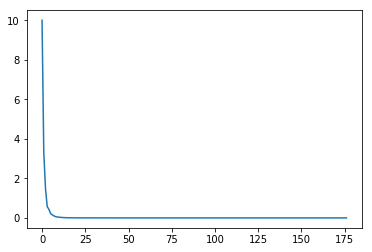

In [50]:
V, pi, max_costs = value_iteration()
# draw_table(pi, 'Policy:')
draw_table(np.around(V, decimals=1), 'Values:')
plt.plot(range(len(max_costs)), max_costs)

In [ ]:
V, pi, max_costs = value_iteration()
# draw_table(pi, 'Policy:')
draw_table(np.around(V, decimals=1), 'Values:')
plt.plot(range(len(max_costs)), max_costs)